### **Ice Marketing Campaign Strategy 2017**

#### **1. Introduction**
- The objective of this product is to develop an advertising strategy for projected winners in the video game sector.
- Historical video game sales data will be analyzed to inform the forecast and identify potential big winners that should garner advertising support proportional to their sales.
- The dataset is the aggregation of several open sources providing insights on user and expert reviews, platforms, and historical sales data.

#### **2. Approach**
The dataset will be analyzed to understand the following:
- Sales Performance Across Different Platforms at Different Points in Time
- Impact of User and Professional Reviews on Sales
- Profitability Across Different Genres
- Regional User Profiles

The project will consist of the following stages:
1. Data Preparation
2. Data Analysis
3. Regional User Profile Definition
4. Hypothesis Testing
5. Conclusion

#### **3. Initialization**
Importing all relevant libraries and loading in the dataset.

In [56]:
import pandas as pd
import numpy as np
import math as mt
import random as rd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from scipy import stats as st

In [57]:
#Load the data

url = "https://raw.githubusercontent.com/Flamingo-Rocker/Video-Game-Marketing-Strategy/refs/heads/main/games.csv"
games = pd.read_csv(url)

#Display first few rows the check that the pull worked
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### **4. Data Preparation**
- Replace column names
- Convert data to required types
- Address missing and/or duplicate values as-necessary
- Enrich the data with additional columns useful for analysis

In [58]:
#Print the general/summary information about the dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [59]:
#Rename the columns to appropriate style
games = games.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)
#print(games.columns)

In [60]:
#Verify the number of duplicated rows and remove if necessary
games.duplicated().sum()

0

There are no duplicate rows - missing values shall now be assessed.

In [61]:
#Review number of missing values
print(games.isna().sum())
#print()

#Drop rows where name or year_of_release are missing
games.dropna(subset=['name', 'year_of_release'], inplace=True)

#Replace missing critic scores with the median critic score
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].median())

#Replace 'tbd' values with NaN in user_score
games['user_score'] = games['user_score'].replace({'tbd': np.nan})

#Convert user_score to float and replace missing values with median score
games['user_score'] = games['user_score'].astype('float64')
games['user_score'] = games['user_score'].fillna(games['user_score'].median())

#Replace missing values in rating column with "No Rating"
games['rating'] = games['rating'].fillna('No Rating')

#Change year_of_release to an integer for cleaner optics
games['year_of_release'] = games['year_of_release'].astype('int64')

#Verify missing values resolved
#print(games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Several steps were taken above to address issues with datatypes and missing values:
- A small number of missing values were detected in the **`name`** and  **`year_of_release`** columns
    - The affected rows were dropped as they would not significantly impact the available data
- There was a significant amount of missing values in the following columns:
    - **`critic_score`**: 
        - Nearly half of the rows were missing data in this column
        - The median critic score was used to fill in missing values to prevent data quality loss
    - **`user_score`**:
        - This column was an **object** datatype and needed to be converted to **float**, but the presence of the 'tbd' string in the column needed to be addressed first
        - To facilitate the conversion, the 'tbd's were replaced with **nan** values
        - The column was then converted to a **float** datatype, and missing values were then replaced with the median user score to prevent data quality loss
    - **`rating`**:
        - Missing values in this column were replaced with the string 'No Rating to prevent data quality loss
    - **`year_of_release`**:
        - Converted to an **int** datatype as years are discrete values adn the decimal is unnecessary

In [62]:
#Create total sales column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Added **`total_sales**` column to aggregate sales in all regions for each row

#### **4. Data Analysis**

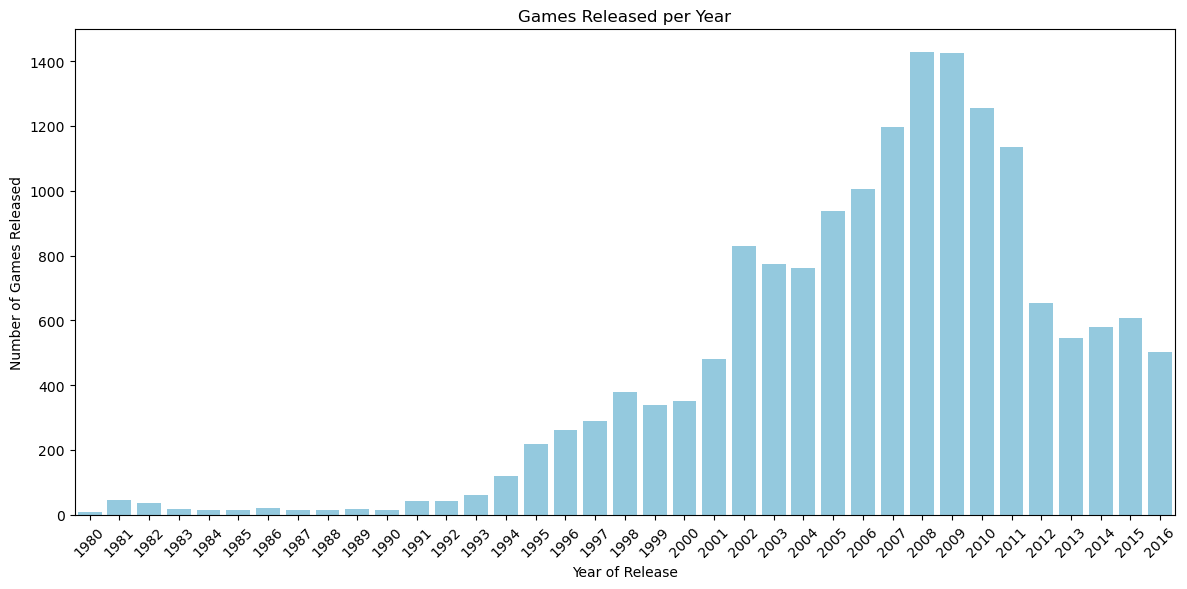

In [81]:
# Group the number games released by year
games_per_year = games.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'games_released']
plt.figure(figsize=(12, 6))
sns.barplot(data=games_per_year, x='year_of_release', y='games_released', color='skyblue')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Games Released per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- From the bar chart above, the years where most games were released were in the late 2000s (approximately 2007 - 2010). 
- In the following code blocks, the most impactful platforms shall be analyzed to determine pertinent lifecycle information. 
- Though the most games were manufactured in this window, the most relevant data for our analysis would likely be in the last 5 years, as game development has appeared to slow as consoles became more advanced and more development time was required to put put out product. 
- For the sake of our analysis, we will proceed with data from the previous 5 years, from 2012 to 2016 and exclude the data prior to this period after we obtain lifecycle insights.

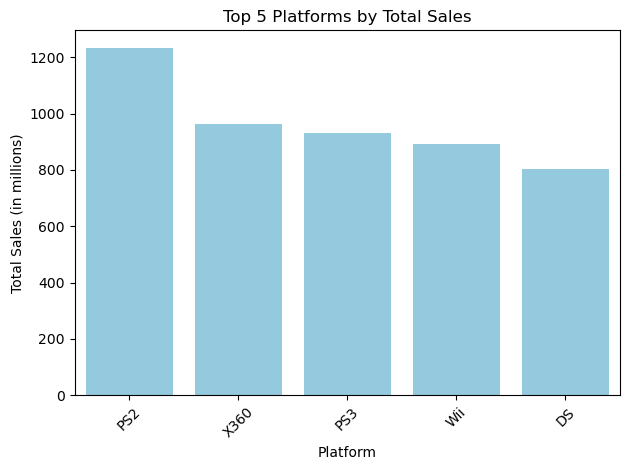

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


In [82]:
# Look at how sales varied from platform to platform. 
# Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
# Find platforms that used to be popular but now have zero sales. 
# How long does it generally take for new platforms to appear and old ones to fade?

# Group the data by platform and year, summing the total sales
platform_sales = games.groupby(['platform'])['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
top_5_platforms = platform_sales.head(5)
sns.barplot(data=top_5_platforms, x='platform', y='total_sales', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 5 Platforms by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_5_platforms

In [83]:
# Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
# Find platforms that used to be popular but now have zero sales. 
# How long does it generally take for new platforms to appear and old ones to fade?

t5platform_sales_per_year = games[
    (games['platform'].isin(top_5_platforms['platform'])) &
    (games['year_of_release'] >= 2000)
    ].groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

sales_dist = px.line(
    t5platform_sales_per_year, 
    x='year_of_release', 
    y='total_sales', 
    title='Total Sales by Top 5 Platforms Over the Years',
    color='platform',
    markers=True
)

sales_dist.update_layout(
    xaxis_title='Year of Release',
    yaxis_title='Total Sales (in millions)',
    legend_title_text='Platform'
)
sales_dist.show()

- The top 5 platforms by total sales were analyzed in the chart above, showing their sales over time.
- The visualization suggests that the average life cycle of a platform spans approximately 10 years.
- The analysis above shall be repeated for the top 20 platforms by totals to confirm this implication and obtain more data to inform how long it takes for new platforms to appear.

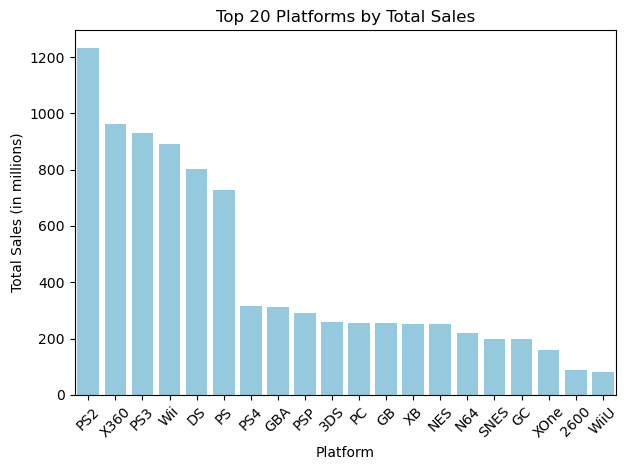

In [84]:
platform_sales = games.groupby(['platform'])['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
top_20_platforms = platform_sales.head(20)
sns.barplot(data=top_20_platforms, x='platform', y='total_sales', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 20 Platforms by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_20_platforms


t20platform_sales_per_year = games[
    (games['platform'].isin(top_20_platforms['platform'])) &
    (games['year_of_release'] >= 1990)
    ].groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

sales_dist = px.line(
    t20platform_sales_per_year, 
    x='year_of_release', 
    y='total_sales', 
    title='Total Sales by Top 20 Platforms Over the Years',
    color='platform',
    markers=True
)

sales_dist.update_layout(
    xaxis_title='Year of Release',
    yaxis_title='Total Sales (in millions)',
    legend_title_text='Platform'
)
sales_dist.show()

- The Top 20 Platforms by Total Sales were analyzed in the visualizations above.
- The observation noted above regarding the average life cycle of a platform spanning approximately 10 years is supported with the additional platform data.
- The visualization above shows that new platforms appear appoximately every 5 years.
    - This can be seen in several examples from releases by the same company, such as:
        - Sony releasing the PS1 in 1994, followed by the PS2 in 2000,
        - Nintendo releasing the N64 in 1996, followed by the GameCube in 2001, and
        - Microsoft released the Xbox in 2000, followed by the Xbox360 in 2005.
- We will now proceed with analyzing these trends in the current market environment, best reflected in the datapoints from 2012 through the end of 2016.

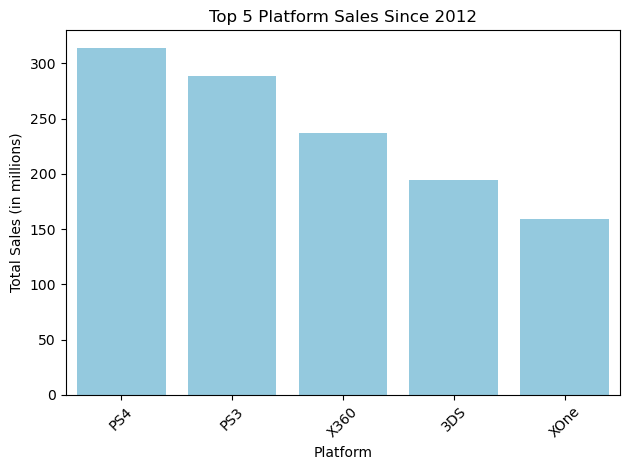

In [85]:
post_2012 = games[games['year_of_release'] >= 2012]
platform_sales = post_2012.groupby(['platform'])['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
top_5_platforms = platform_sales.head(5)
sns.barplot(data=top_5_platforms, x='platform', y='total_sales', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 5 Platform Sales Since 2012')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_5_platforms

t5platform_sales_per_year = games[
    (games['platform'].isin(top_5_platforms['platform'])) &
    (games['year_of_release'] >= 2012)
    ].groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

sales_dist = px.line(
    t5platform_sales_per_year, 
    x='year_of_release', 
    y='total_sales', 
    title='Total Sales by Top 5 Platforms Since 2012',
    color='platform',
    markers=True
)

sales_dist.update_layout(
    xaxis_title='Year of Release',
    yaxis_title='Total Sales (in millions)',
    legend_title_text='Platform',
    xaxis=dict(
        tickmode='linear',
        dtick=1
    )
)
sales_dist.show()

- The visualizations above show that the most profitable platforms in recent years are the 3DS, the PS3, the XBox 360, the PS4, and the XBox One.
- Though the 3DS, PS3 and XBox 360 are among sales leaders, they are clearly on the decline, and are at the end of their lifecyce.
    - It does not make business sense to pursue a marketing strategy with these platforms in mind.
- The PS4 and XBox One platforms are early in their product lifecycle and though it appears as though 2016 was a down year for both systems, the dataset was accepted with the understanding that data from 2016 may be missing. 
    - Both systems are clearly trending upwards in total sales since their inception in 2013, and the marketing strategy should therefore be centered around advertising with these two platforms in mind.

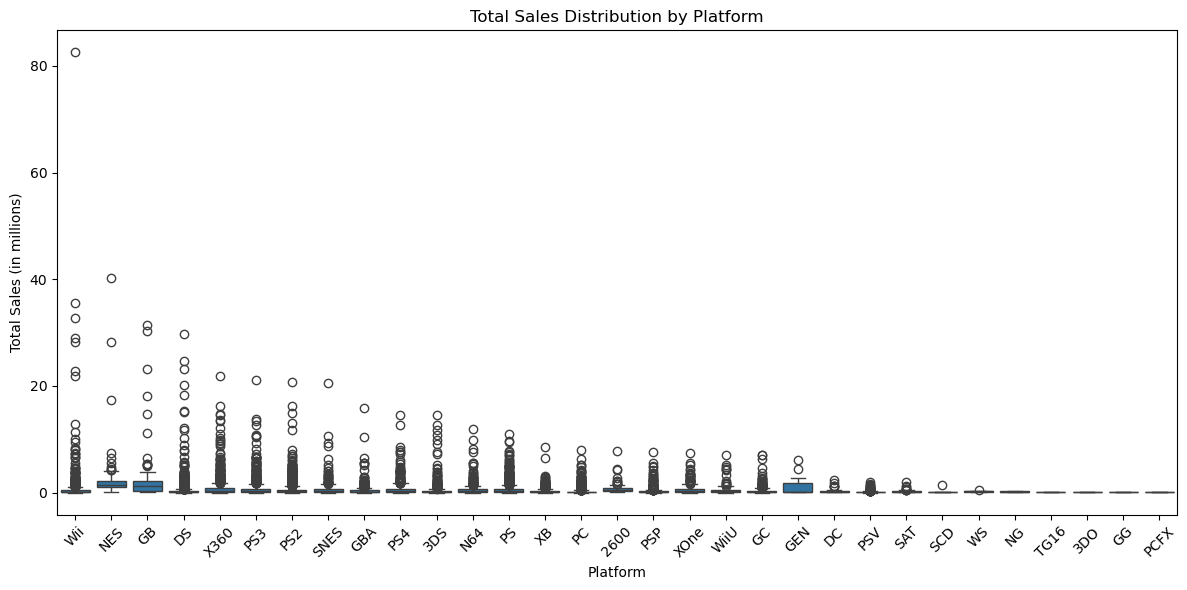

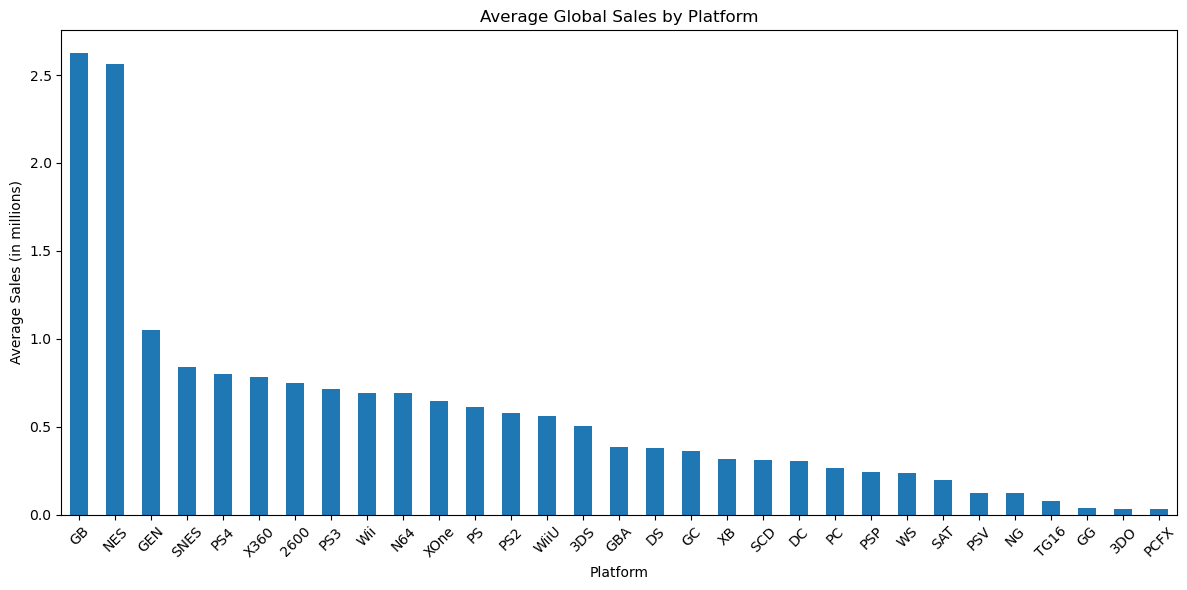

In [86]:
# Build a box plot for the global sales of all games, broken down by platform. 
# Are the differences in sales significant? 
# What about average sales on various platforms? Describe your findings.

plt.figure(figsize=(12, 6))
sns.boxplot(data=games, x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales Distribution by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_sales = games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
avg_sales.plot(kind='bar', figsize=(12, 6), title='Average Global Sales by Platform')
plt.ylabel('Average Sales (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The boxplot above shows that the differences in sales between the different platforms do not appear to be exceptionally different when considering the interquartile ranges.
- There are a very large number of outliers present that that significantly impact the average global sales, but may not be indicative of the actual situation in terms of sales strategy.
    - In reference to the GameBoy and NES average global sales on the bar chart above, for example, it appears as though those two were the most commercially successful platforms ever released. 
    - In actuality, though these two systems were successful in their own right, they had a number of hugely popular games that sold well that artifically drove up the average, though most of the sales sold on those two platforms were not significantly different than the other platforms over time.
    - For the GameBoy and NES specifically, Nintendo was singlehandledy responsible for the mainstream popularity for handheld and home video game system when these systems were introduced to the market, paving the way for the competition to enter in years that followed. 
    - The commercial successes of some of the games that were released on these platforms can be lent to the fact that Nintendo dominated the market in the early years of video game development and sales, and the novelty of these new products benefitted the velocity of sales. 